In [1]:
import pandas as pd
import numpy as np

In [2]:
fullData = None
with open('mysample.txt','r') as fp:
    fullData = fp.read()
print(fullData)

-06-20T09:23:49.803Z INFO vsan-mgmt[healthThread-DefSched-14] [VsanHealthSummaryLogUtil::PrintHealthResult opID=sps-Main-925694-913-f62a-W84023] Cluster ZVx0  Overall Health : red 
   Group network health : red 
      Test hostconnectivity health : green 
      Test clusterpartition health : green 
      Test vsanvmknic health : green 
      Test hostdisconnected health : green 
      Test smallping health : red 
         OnlyFailedPings: FromHost  ToHost  ToDevice  PingResult
                          (Host-74637, Host-73922, Vmk3, Red), (Host-74637, Host-74107, Vmk3, Red), (Host-74637, Host-74045, Vmk3, Red), (Host-74637, Host-73483, Vmk3, Red), (Host-74637, Host-73257, Vmk3, Red), 
                          (Host-74637, Host-73695, Vmk3, Red), (Host-74637, Host-75308, Vmk3, Red), (Host-74637, Host-72985, Vmk3, Red), (Host-74637, Host-73071, Vmk3, Red), (Host-74637, Host-74353, Vmk3, Red), 
                          (Host-74637, Host-75502, Vmk3, Red), (Host-74637, Host-73644, Vmk3, 

In [7]:
myheader = 'vcName|clusterName|OverallHealth'
myvc = 'cloud02-w2.stls.local'
mycluster = fullData.split('Cluster ')[1].split(' Overall')[0]
#print("Cluster Name : "+mycluster)
myoverallHealth = fullData.split('Overall Health :')[1].split('\n')[0]
mylevel1 = myheader+'\n'+myvc+'|'+mycluster+'|'+myoverallHealth
#print(mylevel1)
#print("Overall Health: "+myoverallHealth)
mytesthealths = fullData.split('Test ')
myheader2='vcName|clusterName'
mylevel2 = myvc+'|'+mycluster
for t in mytesthealths:
    if mycluster not in t:
        #print(t.split('\n')[0])
        d=t.split('\n')[0].split(' ')
        myheader2=myheader2+'|'+d[0]
        mylevel2 = mylevel2+'|'+d[-2]

print(mylevel1)

print('\n')

print(myheader2+'\n'+mylevel2)

vcName|clusterName|OverallHealth
cloud02-w2.stls.local|ZVx0 | red 


vcName|clusterName|hostconnectivity|clusterpartition|vsanvmknic|hostdisconnected|smallping|largeping|vmotionpingsmall|vmotionpinglarge|hostlatencycheck|hcldbuptodate|autohclupdate|controlleronhcl|controllerreleasesupport|controllerdriver|controllerfirmware|controllerdiskmode|firmwareproviderhealth|fwrecommendation|perfsvcstatus|vsanenablesupportinsight|pnicconsistent|diskusage|smalldiskstest|vcuptodate|thickprovision|physdiskoverall|physdiskcapacity|physdiskcongestion|physdiskcomplimithealth|componentmetadata|lsomheap|lsomslab|objecthealth|advcfgsync|clomdliveness|diskbalance|resynclimit|vcauthoritative|consistentconfig|timedrift|clustermembership|extendedconfig|upgradesoftware|upgradelowerhosts|diskspace|rcreservation|nodecomponentlimit|limit1hf|vumconfig|vumrecommendation|releasecataloguptodate|objectdphealth|dataprotectionversion|dpdliveness|dpcfgsync|datastoreusage
cloud02-w2.stls.local|ZVx0 |green|green|green|gre

In [31]:
a=fullData.split('OnlyFailedNetworkLatencyCheckResults: ')[1].split('NetworkLatencyAmong')[0].replace('), (','\n').replace(')','').replace('(','')
b=a.split('\n')[0]
a='\n'.join(a.split('\n')[1:]).replace(' ','').replace(',\n','\n')
a=b.replace('  ',' ').replace(' ','|')+'\n'+a.replace(',','|')
#print(a)
with open('Latency.txt','w') as fp:
    fp.write(a)

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('Latency.txt',sep='|')
df.head()


,FromHost,ToHost,NetworkLatencyMs,ThresholdMs,NetworkLatencyCheckResult
0,Host-72741,Host-73598,22.97,5,Yellow
1,Host-72741,Host-74107,21.56,5,Yellow
2,Host-72741,Host-74045,34.40,5,Yellow
3,Host-72741,Host-73483,21.97,5,Yellow
4,Host-72741,Host-73695,39.18,5,Yellow


In [52]:
d=df.groupby(['FromHost','ToHost']).mean()
d.reset_index(inplace=True)
d.sort_values(by='NetworkLatencyMs',ascending=False,inplace=True)
print(d.head())
df2 = d.pivot('FromHost','ToHost','NetworkLatencyMs')
df2.fillna(-1,inplace=True)
df2

       FromHost      ToHost  NetworkLatencyMs  ThresholdMs
305  Host-73483  Host-72689            173.58            5
313  Host-73483  Host-73212            173.54            5
331  Host-73483  Host-75780            173.34            5
322  Host-73483  Host-74045            173.06            5
517  Host-74045  Host-73483            165.26            5


ToHost,Host-72628,Host-72689,Host-72741,Host-72802,Host-72858,Host-72904,Host-72947,Host-72985,Host-73027,Host-73071,...,Host-74045,Host-74107,Host-74319,Host-74353,Host-74637,Host-74914,Host-75072,Host-75308,Host-75502,Host-75780
FromHost,,,,,,,,,,,,,,,,,,,,,
Host-72628,-1.000,52.610,-1.000,53.490,84.210,-1.000,24.270,16.380,5.340,59.530,...,96.53,78.390,45.210,-1.000,17.860,20.970,-1.000,16.290,24.040,50.665
Host-72689,98.580,-1.000,37.530,58.500,80.750,58.340,34.185,58.100,58.270,53.305,...,-1.00,54.520,43.215,58.170,57.940,58.420,37.560,58.020,57.990,-1.000
Host-72741,5.100,16.540,-1.000,14.800,15.280,9.120,15.190,18.600,-1.000,18.680,...,34.40,21.560,14.900,-1.000,18.850,11.640,9.910,18.390,19.400,14.980
Host-72802,12.125,78.740,11.575,-1.000,54.090,11.785,24.530,11.350,10.345,18.060,...,74.78,45.650,-1.000,9.760,-1.000,18.320,12.510,11.370,17.710,74.040
Host-72858,78.610,83.470,78.400,55.355,-1.000,78.560,78.330,42.260,78.490,122.350,...,160.87,-1.000,100.070,41.845,78.490,66.125,78.240,42.035,78.520,88.585
Host-72904,6.660,63.660,5.600,15.300,16.540,-1.000,9.735,19.860,5.160,12.555,...,60.20,24.270,17.550,-1.000,15.290,34.960,-1.000,15.080,19.770,59.490
Host-72947,17.820,20.290,17.680,11.420,11.530,22.310,-1.000,10.020,12.610,23.070,...,18.00,11.690,11.510,12.620,11.430,20.220,12.190,10.070,11.470,20.310
Host-72985,18.390,58.210,14.610,18.290,22.840,18.410,16.050,-1.000,18.260,18.430,...,55.42,19.730,20.490,12.350,13.230,6.910,12.340,5.030,18.400,55.120
Host-73027,6.920,99.970,6.380,27.000,83.010,6.060,12.940,10.780,-1.000,24.475,...,79.01,45.240,16.160,-1.000,12.380,37.550,-1.000,10.780,10.965,96.280


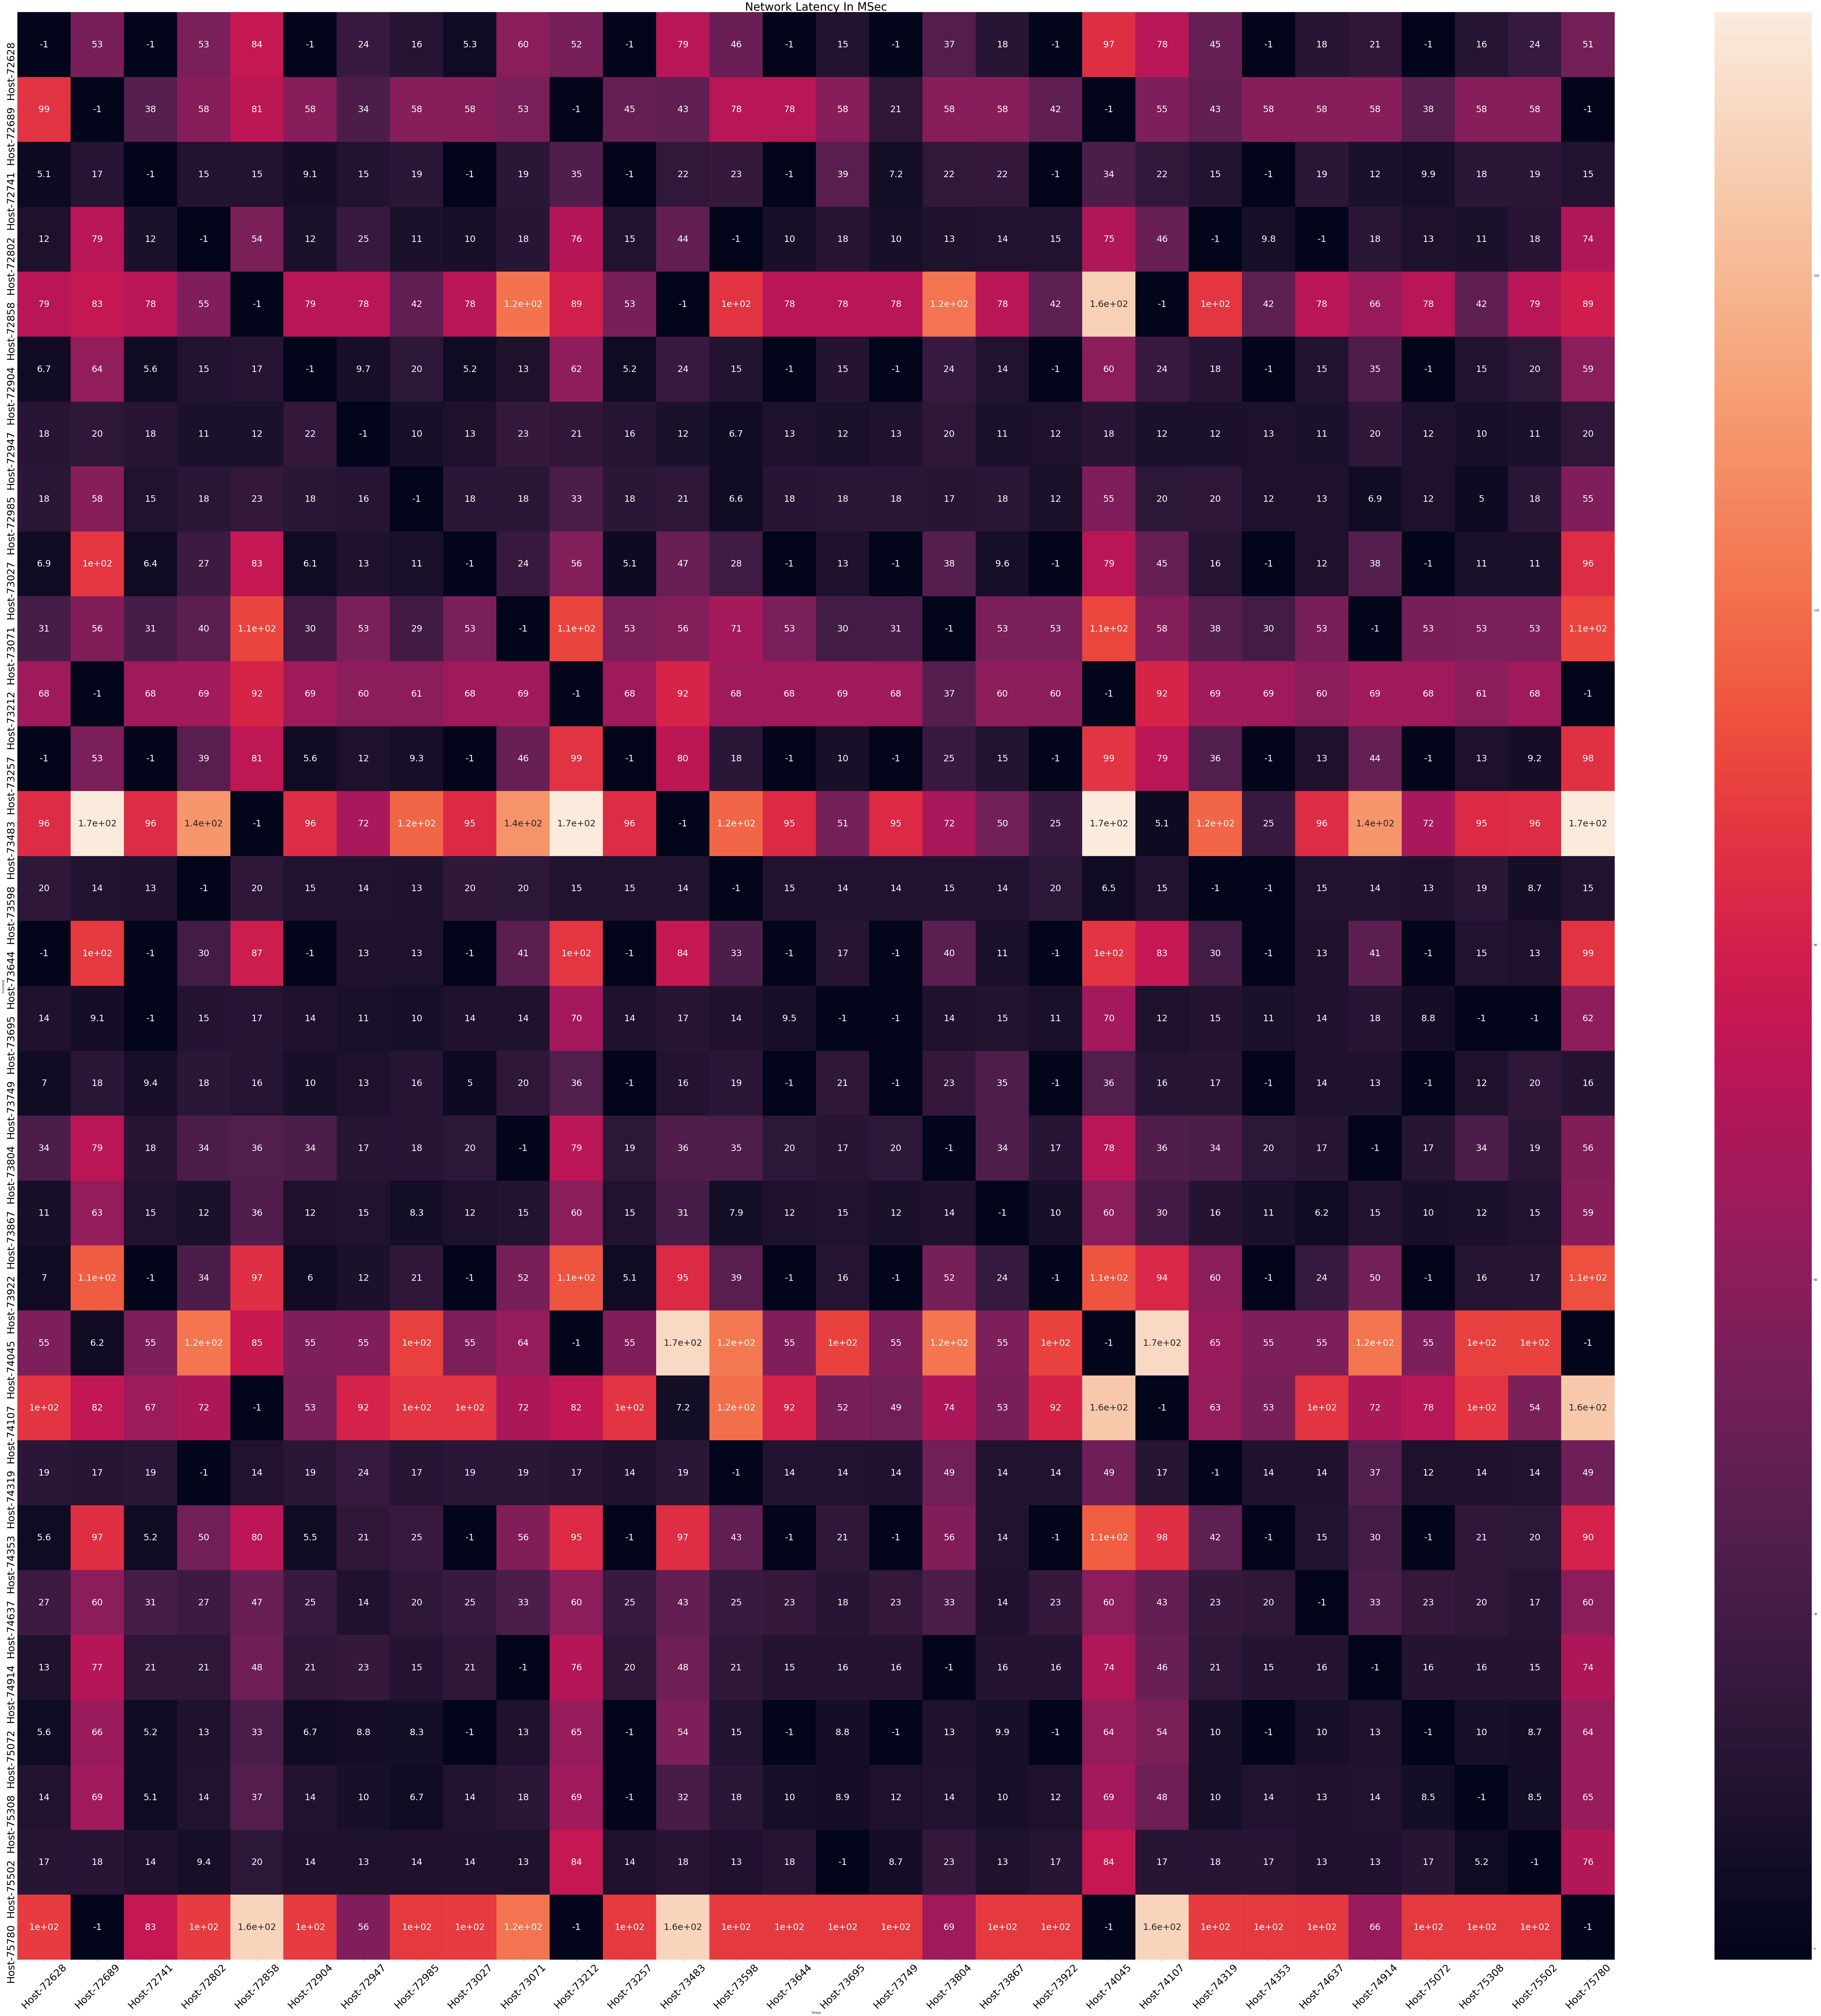

In [56]:
fig,ax=plt.subplots(figsize=(100,100))

sns.heatmap(data=df2,annot=True,annot_kws={'fontsize':32})
plt.title('Network Latency In MSec',fontsize=40)
plt.xticks(rotation=45,fontsize=36)
plt.yticks(fontsize=36,rotation=90)

     
plt.tight_layout()
    
plt.savefig('Latency.png',dpi=300)


,FromHost,ToHost,NetworkLatencyMs,ThresholdMs
305,Host-73483,Host-72689,173.58,5
313,Host-73483,Host-73212,173.54,5
331,Host-73483,Host-75780,173.34,5
322,Host-73483,Host-74045,173.06,5
517,Host-74045,Host-73483,165.26,5


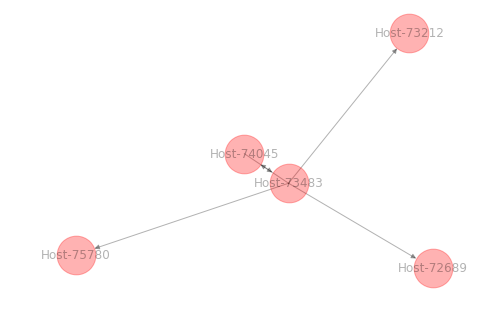

In [67]:
# libraries
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
 
# ------- DIRECTED
 
# Build a dataframe with your connections
# This time a pair can appear 2 times, in one side or in the other!
df = pd.DataFrame({ 'from':d.head()['FromHost'], 'to':d.head()['ToHost']})
df
 
# Build your graph. Note that we use the DiGraph function to create the graph!
G=nx.from_pandas_edgelist(df, 'from', 'to', create_using=nx.DiGraph() )
 
# Make the graph
nx.draw(G, with_labels=True, node_size=1500, alpha=0.3, arrows=True)
 